# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Use citipy to determine city based on latitude and longitude
from citipy import citipy

# Output file (csv)
output_data_file = "output_data/cities.csv"

# latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for lat_lngs and cities
lat_lngs = []
cities = []

# Create random lat and lng combination sets
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Url for API call openweather
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Lists for storing values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Loop through cities making the API call
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
# extracting data and cleaning data
# print cleaned data
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City name not found.")

Processing record 1|strezhevoy
Processing record 2|coquimbo
Processing record 3|opuwo
Processing record 4|hilo
Processing record 5|the valley
Processing record 6|eyemouth
Processing record 7|mandalgovi
Processing record 8|avarua
Processing record 9|vaini
Processing record 10|butaritari
Processing record 11|atuona
City name not found.
Processing record 12|new norfolk
Processing record 13|west wendover
City name not found.
Processing record 14|saint-augustin
Processing record 15|castro
Processing record 16|mataura
City name not found.
Processing record 17|faanui
Processing record 18|carnarvon
Processing record 19|sidi ali
Processing record 20|ilulissat
Processing record 21|cherskiy
Processing record 22|anito
Processing record 23|tiksi
Processing record 24|cape town
Processing record 25|santa cruz
Processing record 26|goba
Processing record 27|hobart
Processing record 28|bonthe
Processing record 29|jamestown
Processing record 30|bethel
Processing record 31|yellowknife
Processing record 32

Processing record 251|mount gambier
Processing record 252|ribeira brava
Processing record 253|chabahar
City name not found.
Processing record 254|nema
Processing record 255|gopalpur
Processing record 256|rawa mazowiecka
Processing record 257|nikolskoye
Processing record 258|prestea
Processing record 259|taltal
Processing record 260|beloha
Processing record 261|punto fijo
City name not found.
Processing record 262|porlamar
Processing record 263|keti bandar
Processing record 264|arua
Processing record 265|hasaki
Processing record 266|grivenskaya
Processing record 267|dunmore town
Processing record 268|lorengau
Processing record 269|esperance
City name not found.
Processing record 270|la ronge
Processing record 271|los banos
Processing record 272|xuchang
Processing record 273|pisco
Processing record 274|vestmannaeyjar
City name not found.
City name not found.
Processing record 275|blagoyevo
Processing record 276|dikson
Processing record 277|fiumicino
Processing record 278|marzuq
Processin

Processing record 500|shingu
Processing record 501|sungairaya
Processing record 502|turkmenabat
Processing record 503|nishihara
Processing record 504|nadym
Processing record 505|dargaville
Processing record 506|quedlinburg
Processing record 507|karratha
Processing record 508|golden
Processing record 509|nemuro
Processing record 510|ayan
Processing record 511|nhulunbuy
Processing record 512|biltine
Processing record 513|acapulco
Processing record 514|roma
Processing record 515|kropotkin
City name not found.
Processing record 516|ixtapa
Processing record 517|asfi
Processing record 518|cooma
City name not found.
Processing record 519|jutai
Processing record 520|sao felix do xingu
Processing record 521|praia da vitoria
Processing record 522|vila velha
Processing record 523|aswan
Processing record 524|la cruz
Processing record 525|mananjary
Processing record 526|sharjah
Processing record 527|isangel
Processing record 528|port augusta
Processing record 529|grand gaube
Processing record 530|k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert the data into a data frame
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Strezhevoy,90,RU,1584297016,80,60.73,77.59,33.80,8.95
1,Coquimbo,75,CL,1584296970,77,-29.95,-71.34,64.40,13.87
2,Opuwo,70,NA,1584296771,45,-18.06,13.84,79.32,1.01
3,Hilo,90,US,1584296715,73,19.73,-155.09,73.40,4.70
4,The Valley,20,AI,1584296972,54,18.22,-63.06,82.40,9.17


In [10]:
#Exporting data to csv file (will be used for vacation challenge as well)
city_df.to_csv("city_list.csv")

#Display DF
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Strezhevoy,90,RU,1584297016,80,60.73,77.59,33.80,8.95
1,Coquimbo,75,CL,1584296970,77,-29.95,-71.34,64.40,13.87
2,Opuwo,70,NA,1584296771,45,-18.06,13.84,79.32,1.01
3,Hilo,90,US,1584296715,73,19.73,-155.09,73.40,4.70
4,The Valley,20,AI,1584296972,54,18.22,-63.06,82.40,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

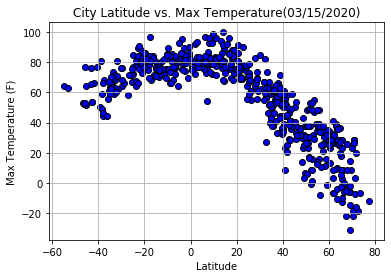

In [14]:


#Creating 1st plot ( Latitude vs Max temp)
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({today})")
plt.savefig("Lat_vs_temp_plot")
plt.show()

#### Latitude vs. Humidity Plot

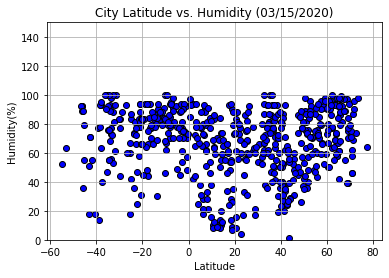

In [15]:
# 2nd plot ( humidity vs latitude)
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.savefig("Lat_vs_humidity_plot")
plt.show()

#### Latitude vs. Cloudiness Plot

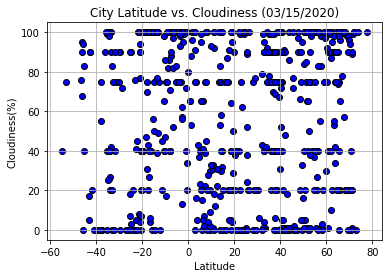

In [16]:
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.savefig("Lat_vs_cloudiness_plot")
plt.show()

#### Latitude vs. Wind Speed Plot

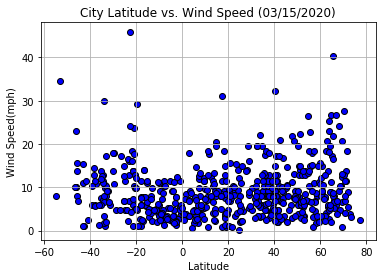

In [17]:
today = time.strftime("%m/%d/%Y")
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.savefig("Lat_vs_windSpeed_plot")
plt.show()

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots


In [23]:
# Create Northern and Southern Hemisphere DataFrames
city_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) > 0, :]
city_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression